In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('dark_background')

### Question 1

In [2]:
def getNormalDistribution(mu, sigma, n=1000):
    """
    Returns a normal distribution with mean mu and standard deviation sigma
    params:
        mu: mean of the distribution
        sigma: standard deviation of the distribution
        n: number of samples to be generated
    returns:
        x: numpy array of samples
        y: numpy array of corresponding probabilities
    """
    x = np.linspace(-4, 10, n)
    y = np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return x, y

In [3]:
px_w1_x, px_w1_y = getNormalDistribution(2, 1, 1000)
px_w2_x, px_w2_y = getNormalDistribution(5, 1, 1000)
ratioOfLiklihood = px_w1_y / px_w2_y

Plotting P(x|w1) and P(x|w2) vs x

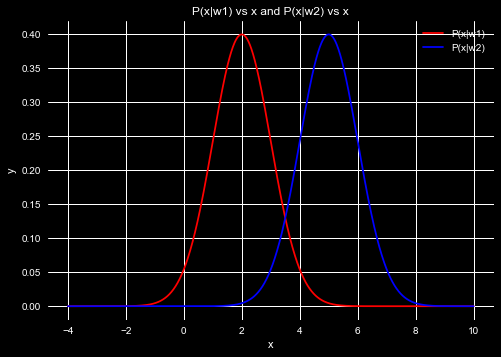

In [4]:
plt.plot(px_w1_x, px_w1_y, label='P(x|w1)', color='red')
plt.plot(px_w2_x, px_w2_y, label='P(x|w2)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('P(x|w1) vs x and P(x|w2) vs x')
plt.legend()
plt.savefig('plots/P(x|w1) vs x and P(x|w2) vs x.png')
plt.show()

Plotting liklihood ratio vs x

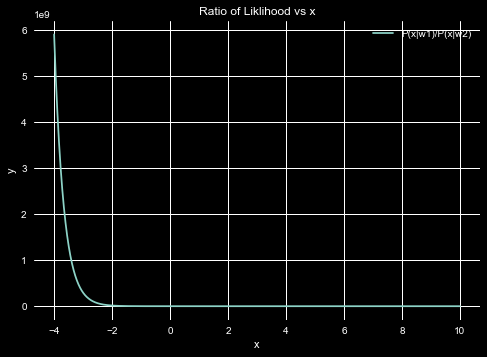

In [5]:
plt.plot(px_w1_x, ratioOfLiklihood, label='P(x|w1)/P(x|w2)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ratio of Liklihood vs x')
plt.legend()
plt.savefig('plots/Ratio of Liklihood vs x.png')
plt.show()

### Question 3

In [6]:
def getCauchy(a, b, x):
    """
    Returns a cauchy distribution with parameters a and b
    params:
        a: scale parameter
        b: location parameter
        x: x-coordinate
    """
    return (1/(np.pi*b)) * (1/(1+((x-a)/b)**2))

In [7]:
def getCauchyDistribution(a, b, n=1000):
    """
    Returns a cauchy distribution with parameters a and b
    params:
        a: scale parameter
        b: location parameter
        n: number of samples to be generated
    returns:
        x: numpy array of samples
        y: numpy array of corresponding probabilities
    """
    x = np.linspace(-4, 12, n)
    y = getCauchy(a, b, x)
    return x, y

In [8]:
def getDistribution(a1, a2, b, p_w1, p_w2, n=1000):
    """
    Returns a distribution with parameters a1, a2, b, p_w1, p_w2
    params:
        a1: scale parameter for w1
        a2: scale parameter for w2
        b: location parameter
        p_w1: probability of w1
        p_w2: probability of w2
        n: number of samples to be generated
    returns:
        x: numpy array of samples
        y: numpy array of corresponding probabilities
    """
    px_w1_x, px_w1_y = getCauchyDistribution(a1, b, n)
    px_x = px_w1_x
    px_y = p_w1 * getCauchy(a1, b, px_x) + p_w2 * getCauchy(a2, b, px_x)
    pw1_x_x = px_w1_x
    pw1_x_y = p_w1 * px_w1_y/px_y
    return pw1_x_x, pw1_x_y

In [9]:
# List of parameters
p_w1 = 0.5
p_w2 = 0.5
a1 = 3
a2 = 5
b = 1

In [10]:
pw1_x_x, pw1_x_y = getDistribution(a1, a2, b, p_w1, p_w2)

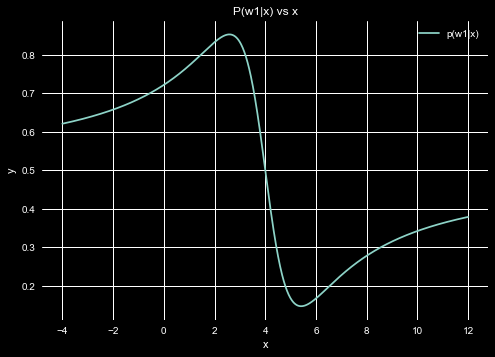

In [11]:
plt.plot(pw1_x_x, pw1_x_y, label='p(w1|x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('P(w1|x) vs x')
plt.legend()
plt.savefig('plots/P(w1|x) vs x.png')
plt.show()